In [1]:
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# # # Load data and set directory

In [2]:
#Setting directory and read csv output from the GEE
belmontdir = "C:/Users/Nazia/Documents/OSU/Belmont/PlotData/"
doyNTL_allgrid3 = "allNTL_allgrid3_props.csv" 
df_allntl = pd.read_csv(belmontdir + doyNTL_allgrid3)

In [3]:
df_allntl.columns

Index(['settl_pcod', 'NTLmean', 'YYYY_MM_DD'], dtype='object')

In [4]:
print(df_allntl)

            settl_pcod   NTLmean  YYYY_MM_DD
0        MG11117000035  0.164565  2012-01-19
1        MG11117000050  0.177991  2012-01-19
2        MG11117000070  0.139347  2012-01-19
3        MG11117000080  0.124084  2012-01-19
4        MG11117000081  0.149829  2012-01-19
...                ...       ...         ...
2886760  MG72716000003  2.634741  2023-12-30
2886761  MG72716000206  0.215901  2023-12-30
2886762  MG72716000242  0.300109  2023-12-30
2886763  MG72716000429  0.683501  2023-12-30
2886764  MG72716000438  0.219506  2023-12-30

[2886765 rows x 3 columns]


In [5]:
# Convert 'YYYY_MM_DD' column to datetime
df_allntl['YYYY_MM_DD'] = pd.to_datetime(df_allntl['YYYY_MM_DD'])

# Display the first few rows to verify the conversion
print(df_allntl.head())


      settl_pcod   NTLmean YYYY_MM_DD
0  MG11117000035  0.164565 2012-01-19
1  MG11117000050  0.177991 2012-01-19
2  MG11117000070  0.139347 2012-01-19
3  MG11117000080  0.124084 2012-01-19
4  MG11117000081  0.149829 2012-01-19


In [6]:
# Pivot the table
df_date = df_allntl.pivot(index='settl_pcod', columns='YYYY_MM_DD', values='NTLmean')

# Save the modified DataFrame to a CSV file
output_file = belmontdir + "allNTL_allgrid3_datetime.csv"
df_date.to_csv(output_file, index=True)  # Set index=True to include 'settl_pcod' in the CSV

In [7]:
print(df_date.index.name)

settl_pcod


In [8]:
print(df_date.columns)

DatetimeIndex(['2012-01-19', '2012-01-20', '2012-01-21', '2012-01-22',
               '2012-01-23', '2012-01-24', '2012-01-25', '2012-01-26',
               '2012-01-27', '2012-01-28',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='YYYY_MM_DD', length=4341, freq=None)


In [9]:
print(df_date.index)

Index(['MG00000000032', 'MG00000000033', 'MG00000000037', 'MG00000000038',
       'MG11000000001', 'MG11000000005', 'MG11000000013', 'MG11000000022',
       'MG11000000030', 'MG11000000034',
       ...
       'MG72712000205', 'MG72712000225', 'MG72712000227', 'MG72716000001',
       'MG72716000002', 'MG72716000003', 'MG72716000206', 'MG72716000242',
       'MG72716000429', 'MG72716000438'],
      dtype='object', name='settl_pcod', length=665)


In [10]:
# print(df_date)

In [11]:
# Next up is the cyclone track data
cyclone_track_gdf = gpd.read_file(belmontdir+"MadTrack_SegmentID_DATE.shp")
#print(cyclone_track_gdf.columns)
columns_to_keep = ['NAME', 'DATE', 'Segment_ID', 'NATURE']
onset_df = cyclone_track_gdf[columns_to_keep]
onset_df = onset_df.rename(columns={'NAME': 'Cyclone', 'DATE': 'Onset_Date'})
print(onset_df.columns)

Index(['Cyclone', 'Onset_Date', 'Segment_ID', 'NATURE'], dtype='object')


In [12]:
print(onset_df)

        Cyclone  Onset_Date  Segment_ID NATURE
0     NOT_NAMED  1980-01-10           1     NR
1     NOT_NAMED  1980-01-10           2     NR
2     NOT_NAMED  1980-01-10           3     NR
3     NOT_NAMED  1980-01-10           4     NR
4     NOT_NAMED  1980-01-10           5     NR
...         ...         ...         ...    ...
8284     FREDDY  2023-03-07          75     NR
8285     FREDDY  2023-03-07          76     NR
8286     FREDDY  2023-03-07          77     NR
8287     FREDDY  2023-03-07          78     NR
8288     FREDDY  2023-03-07          79     NR

[8289 rows x 4 columns]


In [13]:
unique_names = onset_df['Cyclone'].unique()
print(unique_names)

['NOT_NAMED' 'HYACINTHE' 'KOLIA' 'BETTINA' 'BERT:CHRISTE' 'EDWIG'
 'HELYETTE' 'IADINE' 'JOHANNE' 'KLARA' 'BENEDICTE' 'ELECTRE' 'FRIDA'
 'JUSTINE' 'FELY' 'ANDRY' 'CABOTO' 'DOMOINA' 'GALY' 'IMBOA' 'KAMISY'
 'ANETY' 'ESITERA' 'FELIKSA' 'HELISAONINA' 'ALIFREDY' 'BEROBIA' 'GISTA'
 'HONORININA' 'ELIZABETHA' 'BENANDRO' 'CALIDERA' 'DOAZA' 'FILAO' 'HELY'
 'CALASANJY' 'IANA' 'JINABO' 'ALIBERA' 'HANTA' 'CYNTHIA' 'BRYNA'
 'DESSILIA' 'FINELLA' 'GRACIA' 'HUTELLE' 'IONIA' 'DAISY' 'GERALDA'
 'JULITA' 'LITANNE' 'KELVINA' 'NADIA' 'CHRISTELLE' 'JOSTA' 'B29596'
 'BONITA' 'DOLORESSE' 'EDWIGE' 'FABRIOLA' 'GRETELLE' 'JOSIE' 'BELTANE'
 'DAVINA' 'ASTRIDE' 'ELINE:LEONE' 'GLORIA' 'HUDAH' 'DERA' 'CYPRIEN'
 'GUILLAUME' 'HARY' 'KESINY' 'ATANG' 'DELFINA' 'FARI' 'JAPHET' 'MANOU'
 'CELA' 'ELITA' 'GAFILO' 'BENTOJANA' 'ERNEST' 'FELAPI' 'BOLOETSE' 'ANITA'
 'BONDO' 'CLOVIS' 'ENOK' 'FAVIO' 'INDLALA' 'JAYA' 'ELNUS' 'FAME' 'IVAN'
 'JOKWE' 'ASMA' 'ERIC' 'FANELE' 'IZILDA' 'JADE' 'BONGANI' 'DAVID' 'FAMI'
 'HUBERT' 'JOEL' 'BINGI

In [14]:
# Now to find the storms that we'll filter for later
# Filter the DataFrame for rows where NATURE_JS is not equal to 'NR'
smallStorm_df = onset_df[onset_df['NATURE'] != 'NR']

# Select the NAMES column from the filtered DataFrame
smallstorm_names = smallStorm_df['Cyclone'].unique()

# Print or use the selected names
print(smallstorm_names)

['NOT_NAMED' 'HYACINTHE' 'KOLIA' 'BETTINA' 'BERT:CHRISTE' 'EDWIG'
 'HELYETTE' 'IADINE' 'JOHANNE' 'KLARA' 'BENEDICTE' 'ELECTRE' 'FRIDA'
 'JUSTINE' 'FELY' 'ANDRY' 'CABOTO' 'DOMOINA' 'GALY' 'KAMISY' 'ANETY'
 'ESITERA' 'FELIKSA' 'HELISAONINA' 'ALIFREDY' 'BEROBIA' 'GISTA'
 'HONORININA' 'ELIZABETHA' 'BENANDRO' 'CALIDERA' 'DOAZA' 'FILAO' 'HELY'
 'CALASANJY' 'IANA' 'JINABO' 'ALIBERA' 'HANTA' 'CYNTHIA' 'BRYNA'
 'DESSILIA' 'FINELLA' 'GRACIA' 'HUTELLE' 'IONIA' 'DAISY' 'GERALDA'
 'JULITA' 'LITANNE' 'KELVINA' 'NADIA' 'CHRISTELLE' 'JOSTA' 'B29596'
 'BONITA' 'DOLORESSE' 'EDWIGE' 'FABRIOLA' 'GRETELLE' 'JOSIE' 'BELTANE'
 'DAVINA' 'ASTRIDE' 'ELINE:LEONE' 'GLORIA' 'HUDAH' 'DERA' 'CYPRIEN'
 'GUILLAUME' 'HARY' 'KESINY' 'ATANG' 'DELFINA' 'FARI' 'JAPHET' 'MANOU'
 'CELA' 'ELITA' 'GAFILO' 'BENTOJANA' 'ERNEST' 'FELAPI' 'BOLOETSE' 'ANITA'
 'BONDO' 'CLOVIS' 'ENOK' 'FAVIO' 'INDLALA' 'JAYA' 'ELNUS' 'FAME' 'IVAN'
 'JOKWE' 'ASMA' 'ERIC' 'FANELE' 'IZILDA' 'JADE' 'BONGANI' 'DAVID' 'FAMI'
 'HUBERT' 'JOEL' 'BINGIZA' 'CHA

In [15]:
# Now to find the storms that we'll filter for later
# Filter the DataFrame for rows where NATURE_JS is equal to 'NR'
NR_Storm_df = onset_df[onset_df['NATURE'] == 'NR']

# Select the NAMES column from the filtered DataFrame
NR_storm_names = NR_Storm_df['Cyclone'].unique()

# Print or use the selected names
print(NR_storm_names)

['NOT_NAMED' 'KOLIA' 'FELY' 'IMBOA' 'ANETY' 'FELIKSA' 'CALIDERA'
 'DESSILIA' 'DAISY' 'CHRISTELLE' 'BELTANE' 'DERA' 'CYPRIEN' 'GUILLAUME'
 'GAFILO' 'FELAPI' 'INDLALA' 'HUBERT' 'BINGIZA' 'CHANDA' 'DIANE' 'IMAN'
 'BATSIRAI' 'DUMAKO' 'EMNATI' 'GOMBE' 'JASMINE' 'CHENESO' 'FREDDY']


In [16]:
filtered_rows = onset_df[onset_df['Cyclone'] == 'HUBERT']

# Print the filtered rows
print(filtered_rows)

     Cyclone  Onset_Date  Segment_ID NATURE
6280  HUBERT  2010-03-07           1     TS
6281  HUBERT  2010-03-07           2     TS
6282  HUBERT  2010-03-07           3     TS
6283  HUBERT  2010-03-07           4     TS
6284  HUBERT  2010-03-07           5     TS
...      ...         ...         ...    ...
6360  HUBERT  2010-03-13          81     TS
6361  HUBERT  2010-03-13          82     TS
6362  HUBERT  2010-03-13          83     TS
6363  HUBERT  2010-03-13          84     TS
6364  HUBERT  2010-03-13          85     TS

[85 rows x 4 columns]


In [17]:
# Ensure that 'Onset_Date' is in datetime format
onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Filter the DataFrame for rows where the year is 2012 or later
filtered_df = onset_df[onset_df['Onset_Date'] >= pd.to_datetime('2012-01-19')]

# Extract unique cyclone names
Blck_Mrbl_unique = filtered_df['Cyclone'].unique()

# Print the unique cyclone names
print(Blck_Mrbl_unique)

['GIOVANNA' 'IRINA' 'ANAIS' 'HARUNA' 'DELIWE' 'HELLEN' 'CHEDZA' 'FUNDI'
 'NOT_NAMED' 'HALIBA' 'ABELA' 'ENAWO' 'AVA' 'ELIAKIM' 'FAKIR' 'IDAI'
 'KENNETH' 'BELNA' 'DIANE' 'FRANCISCO' 'HEROLD' 'CHALANE' 'ELOISE' 'IMAN'
 'JOBO' 'ANA' 'BATSIRAI' 'DUMAKO' 'EMNATI' 'GOMBE' 'JASMINE' 'CHENESO'
 'FREDDY']


In [18]:
## Making sure there are no overlaps
# Convert your lists to sets
set_smallstorm_names = set(smallstorm_names)
set_NR_storm_names = set(NR_storm_names)

# Find the intersection
common_elements = set_smallstorm_names.intersection(set_NR_storm_names)

# Check if there is any overlap
if common_elements:
    print("Common elements:", common_elements)
else:
    print("No common elements found.")
    
# Remove elements from smallstorm_names that are in NR_Storm_names
filtered_smallstorm_names = [name for name in smallstorm_names if name not in set_NR_storm_names]

print(filtered_smallstorm_names)

Common elements: {'DAISY', 'BINGIZA', 'KOLIA', 'FELIKSA', 'CHRISTELLE', 'CALIDERA', 'BELTANE', 'FELAPI', 'DERA', 'GUILLAUME', 'DIANE', 'FELY', 'DESSILIA', 'GAFILO', 'HUBERT', 'IMAN', 'CYPRIEN', 'NOT_NAMED', 'CHANDA', 'ANETY', 'INDLALA'}
['HYACINTHE', 'BETTINA', 'BERT:CHRISTE', 'EDWIG', 'HELYETTE', 'IADINE', 'JOHANNE', 'KLARA', 'BENEDICTE', 'ELECTRE', 'FRIDA', 'JUSTINE', 'ANDRY', 'CABOTO', 'DOMOINA', 'GALY', 'KAMISY', 'ESITERA', 'HELISAONINA', 'ALIFREDY', 'BEROBIA', 'GISTA', 'HONORININA', 'ELIZABETHA', 'BENANDRO', 'DOAZA', 'FILAO', 'HELY', 'CALASANJY', 'IANA', 'JINABO', 'ALIBERA', 'HANTA', 'CYNTHIA', 'BRYNA', 'FINELLA', 'GRACIA', 'HUTELLE', 'IONIA', 'GERALDA', 'JULITA', 'LITANNE', 'KELVINA', 'NADIA', 'JOSTA', 'B29596', 'BONITA', 'DOLORESSE', 'EDWIGE', 'FABRIOLA', 'GRETELLE', 'JOSIE', 'DAVINA', 'ASTRIDE', 'ELINE:LEONE', 'GLORIA', 'HUDAH', 'HARY', 'KESINY', 'ATANG', 'DELFINA', 'FARI', 'JAPHET', 'MANOU', 'CELA', 'ELITA', 'BENTOJANA', 'ERNEST', 'BOLOETSE', 'ANITA', 'BONDO', 'CLOVIS', 'ENOK'

In [19]:
# Ensure that 'Onset_Date' is in datetime format
onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Filter the DataFrame for rows where the year is 2012 or later
filtered_df = onset_df[onset_df['Onset_Date'] >= pd.to_datetime('2012-01-19')]

# Extract unique cyclone names
Blck_Mrbl_unique = filtered_df['Cyclone'].unique()

# Print the unique cyclone names
print(Blck_Mrbl_unique)
print(len(Blck_Mrbl_unique))

['GIOVANNA' 'IRINA' 'ANAIS' 'HARUNA' 'DELIWE' 'HELLEN' 'CHEDZA' 'FUNDI'
 'NOT_NAMED' 'HALIBA' 'ABELA' 'ENAWO' 'AVA' 'ELIAKIM' 'FAKIR' 'IDAI'
 'KENNETH' 'BELNA' 'DIANE' 'FRANCISCO' 'HEROLD' 'CHALANE' 'ELOISE' 'IMAN'
 'JOBO' 'ANA' 'BATSIRAI' 'DUMAKO' 'EMNATI' 'GOMBE' 'JASMINE' 'CHENESO'
 'FREDDY']
33


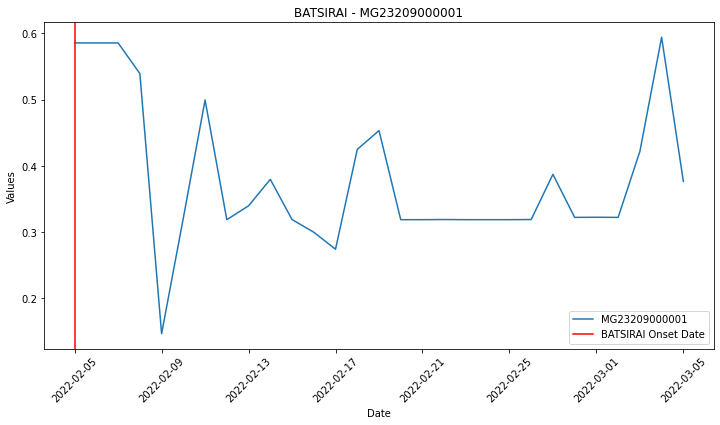

In [20]:
# Set the cyclone name and the number of days for the time delta
cyclone_name = 'BATSIRAI'
lag = 28

# Grid value
grid3 = 'MG23209000001'

# Check if the cyclone exists in the onset_df
if cyclone_name in onset_df['Cyclone'].values:
    # Get the onset date for the cyclone
    cyclone_onset = onset_df.loc[onset_df['Cyclone'] == cyclone_name, 'Onset_Date'].values[0]

    # Convert the onset date to datetime
    cyclone_onset = pd.to_datetime(cyclone_onset)

    # Select the range of dates (2 weeks before and 2 weeks after cyclone onset)
    range_end = cyclone_onset + pd.Timedelta(days=lag)
    date_range = pd.date_range(start=cyclone_onset, end=range_end)

    # Check if 'grid3' value is in the DataFrame index and plot the data for it
    if grid3 in df_date.index:
        # Extract the row for 'grid3'
        specific_row = df_date.loc[grid3, date_range]

        # Plotting
        plt.figure(figsize=(12, 6))
        plt.plot(date_range, specific_row, label=grid3)

        plt.title(f'{cyclone_name} - {grid3}')
        plt.xlabel('Date')
        plt.ylabel('Values')
        plt.xticks(rotation=45)
        plt.axvline(x=cyclone_onset, color='r', linestyle='-', label=f'{cyclone_name} Onset Date')
        plt.legend()
        plt.show()
    else:
        print(f"Row with '{grid3}' not found.")
else:
    print(f"Onset date for '{cyclone_name}' cyclone not found in the onset_df.")


C:\Users\Nazia\AppData\Local\Temp/ipykernel_24796/2087378543.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels, rotation=45)


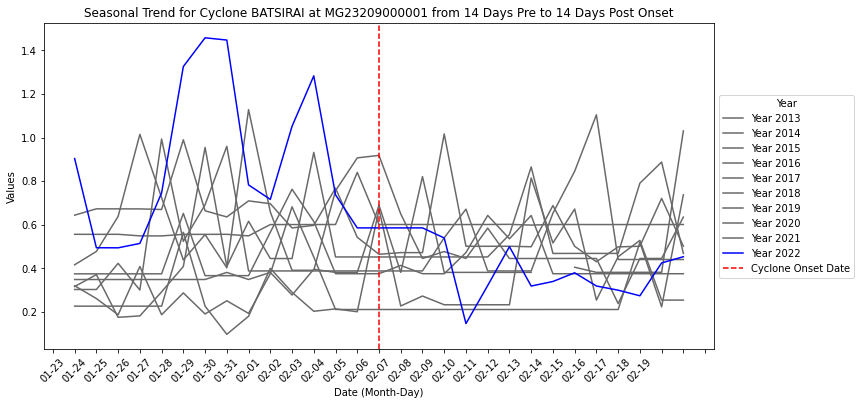

In [21]:
cyclone_name = 'BATSIRAI'
lag = 14  # Number of days before and after the onset date
grid3 = 'MG23209000001'  # Replace with your actual grid3 value

# Check if the cyclone exists in the onset_df
if cyclone_name in onset_df['Cyclone'].values:
    # Prepare the plot
    plt.figure(figsize=(12, 6))
    ax = plt.gca()

    # Get the onset date for the cyclone
    cyclone_onset = pd.to_datetime(onset_df.loc[onset_df['Cyclone'] == cyclone_name, 'Onset_Date'].values[0])

    # Convert columns to DateTime to enable filtering by date
    df_date.columns = pd.to_datetime(df_date.columns)

    # Loop through the desired years
    for year in range(2013, 2023):  # Modify the range as needed
        # Set the onset date for the current year
        current_year_onset = cyclone_onset.replace(year=year)

        # Define the start and end dates based on the lag
        start_date = current_year_onset - pd.Timedelta(days=lag)
        end_date = current_year_onset + pd.Timedelta(days=lag)

        # Filter data for the specific 'settl_pcod' and date range
        if grid3 in df_date.index:
            # Select the data for the specific 'settl_pcod'
            specific_data = df_date.loc[grid3]
            
            # Filter the data to include only the specified period around the onset date
            specific_data = specific_data[(specific_data.index >= start_date) & (specific_data.index <= end_date)]

            # Choose color based on the year
            color = 'blue' if year == cyclone_onset.year else 'dimgrey'

            # Plot the data for the specific year with a unique label
            ax.plot(range(len(specific_data)), specific_data, label=f'Year {year}', color=color)

    # Set the x-axis ticks and labels
    total_days = 2 * lag + 1
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Set major ticks every day
    tick_labels = [(cyclone_onset - pd.Timedelta(days=lag) + pd.Timedelta(days=i)).strftime('%m-%d') for i in range(total_days)]
    ax.set_xticklabels(tick_labels, rotation=45)

    # Adding a vertical red line at the onset date
    ax.axvline(lag, color='red', linestyle='--', label='Cyclone Onset Date')  # Onset date is at position 'lag' in the range

    # Title and labels
    plt.title(f'Seasonal Trend for Cyclone {cyclone_name} at {grid3} from {lag} Days Pre to {lag} Days Post Onset')
    plt.xlabel('Date (Month-Day)')
    plt.ylabel('Values')

    # Show the legend
    plt.legend(title='Year')

     # Adjust the legend position to the right of the plot
    ax.legend(title='Year', loc='center left', bbox_to_anchor=(1, 0.5))

    # Show the plot
    plt.show()
else:
    print(f"Cyclone name '{cyclone_name}' not found in the dataset.")

In [22]:
# # Define the settlement as 'grid3'
# grid3 = 'MG23209000001'

# # Select the range of dates
# post_start_date = '2023-01-22'  #2 weeks before Batsirai
# post_end_date = pd.to_datetime(post_start_date) + pd.Timedelta(days=28)
# date_range = pd.date_range(start=post_start_date, end=post_end_date)

# # Check if 'grid3' value is in the DataFrame index and plot the data for it
# if grid3 in df_date.index:
#     # Extract the row for 'grid3'
#     specific_row = df_date.loc[grid3, date_range]

#     # Plotting
#     plt.figure(figsize=(12, 6))
#     plt.plot(date_range, specific_row, label=grid3)

#     plt.title(f'Batsirai - {grid3}')
#     plt.xlabel('Date')
#     plt.ylabel('Values')
#     plt.xticks(rotation=45)
#     plt.axvline(x=pd.to_datetime('2023-02-05'), color='r', linestyle='-', label='Batsirai Onset Date')
#     plt.legend()
#     plt.show()
# else:
#     print(f"Row with '{grid3}' not found.")

## Normalized difference in NTL two weeks after the cyclone onset

### Historical Pre and Post average value for Batsirai

In [23]:
# # Set Cyclone Name and Lag value 
# cyclone_name = 'BATSIRAI'
# lag = 14  # Number of days before the onset date

# # Ensure 'Onset_Date' is in datetime format
# onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# # Initialize an empty DataFrame to store the results
# result_df = pd.DataFrame(index=df_date.index)

# # Find the onset date for the specified cyclone
# if cyclone_name in onset_df['Cyclone'].values:
#     # Get the onset date
#     cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]

#     # Create a boolean mask for the pre date range
#     pre_date_mask_range = pd.date_range(start=cyclone_onset_date - pd.Timedelta(days=lag), end=cyclone_onset_date)

#     # Apply the mask to filter the relevant columns for the pre date range
#     pre_filtered_dates = df_date.columns[df_date.columns.isin(pre_date_mask_range)]

#     # Calculate the mean for the filtered pre date range
#     if not pre_filtered_dates.empty:
#         hist_pre_average_values = df_date[pre_filtered_dates].mean(axis=1)
#     else:
#         print(f"No data available for the specified pre date range for {cyclone_name}.")
#         hist_pre_average_values = pd.Series([float('nan')] * len(df_date), index=df_date.index)

#     # Add pre values as new columns to the result DataFrame
#     result_df[f'hist_pre_{cyclone_name}_average_values'] = hist_pre_average_values
# else:
#     print(f"Cyclone '{cyclone_name}' not found in the dataset.")

# # Create updated_results_df with all pre values
# updated_results_df = result_df.copy()

# # Display the updated DataFrame
# print(updated_results_df)


In [45]:
# Set Cyclone Name and Lag value 
cyclone_name = 'BATSIRAI'
lag = 14  # Number of days before the onset date

# Ensure 'Onset_Date' is in datetime format
onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(index=df_date.index)

# Find the onset date for the specified cyclone
if cyclone_name in onset_df['Cyclone'].values:
    # Get the onset date for the cyclone
    cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]

    # Determine the year of the cyclone onset
    cyclone_onset_year = cyclone_onset_date.year

    # Loop over each year before the cyclone onset year
    for year in range(df_date.columns.year.min(), cyclone_onset_year):
        # Define the date range for each year
        pre_start_date = pd.Timestamp(year=year, month=cyclone_onset_date.month, day=cyclone_onset_date.day) - pd.Timedelta(days=lag)
        pre_end_date = pd.Timestamp(year=year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)

        # Create the date mask range
        pre_date_mask_range = pd.date_range(start=pre_start_date, end=pre_end_date)

        # Filter for relevant columns
        pre_filtered_dates = df_date.columns[df_date.columns.isin(pre_date_mask_range)]

        # Calculate and store the mean values
        if not pre_filtered_dates.empty:
            result_df[f'hist_pre_{cyclone_name}_average_values_{year}'] = df_date[pre_filtered_dates].mean(axis=1)
        else:
            print(f"No data available for the specified pre date range in {year}.")
else:
    print(f"Cyclone '{cyclone_name}' not found in the dataset.")

# Display the updated DataFrame
print(result_df)

# Save the DataFrame as a CSV file
result_df.to_csv(belmontdir + 'result_df1.csv')

# Display a message indicating the file was saved successfully
"result_df1.csv has been successfully saved."

               hist_pre_BATSIRAI_average_values_2012  \
settl_pcod                                             
MG00000000032                               0.556707   
MG00000000033                               0.595294   
MG00000000037                               0.184602   
MG00000000038                               0.237982   
MG11000000001                               0.374317   
...                                              ...   
MG72716000003                               0.591909   
MG72716000206                               0.187098   
MG72716000242                               0.149262   
MG72716000429                               0.127780   
MG72716000438                               0.123125   

               hist_pre_BATSIRAI_average_values_2013  \
settl_pcod                                             
MG00000000032                               0.521684   
MG00000000033                               0.621251   
MG00000000037                               0.2

'result_df1.csv has been successfully saved.'

In [46]:
# Set Cyclone Name and Lag value 
cyclone_name = 'BATSIRAI'
lag = 14  # Number of days after the onset date

# Ensure 'Onset_Date' is in datetime format
onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(index=df_date.index)

# Find the onset date for the specified cyclone
if cyclone_name in onset_df['Cyclone'].values:
    # Get the onset date for the cyclone
    cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]

    # Determine the year of the cyclone onset
    cyclone_onset_year = cyclone_onset_date.year

    # Loop over each year before the cyclone onset year
    for year in range(df_date.columns.year.min(), cyclone_onset_year):
        # Define the date range for each year
        post_start_date = pd.Timestamp(year=year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)
        post_end_date = post_start_date + pd.Timedelta(days=lag)

        # Create the date mask range
        post_date_mask_range = pd.date_range(start=post_start_date, end=post_end_date)

        # Filter for relevant columns
        post_filtered_dates = df_date.columns[df_date.columns.isin(post_date_mask_range)]

        # Calculate and store the mean values
        if not post_filtered_dates.empty:
            result_df[f'hist_post_{cyclone_name}_average_values_{year}'] = df_date[post_filtered_dates].mean(axis=1)
        else:
            print(f"No data available for the specified post date range in {year}.")
else:
    print(f"Cyclone '{cyclone_name}' not found in the dataset.")

# updated_result_df = result_df.copy()
print(result_df)

# Save the DataFrame as a CSV file
result_df.to_csv(belmontdir + 'result_df2.csv')

# Display a message indicating the file was saved successfully
"result_df2.csv has been successfully saved."

               hist_post_BATSIRAI_average_values_2012  \
settl_pcod                                              
MG00000000032                                0.424614   
MG00000000033                                0.547464   
MG00000000037                                0.153338   
MG00000000038                                0.239618   
MG11000000001                                0.310061   
...                                               ...   
MG72716000003                                0.520954   
MG72716000206                                0.160220   
MG72716000242                                0.201410   
MG72716000429                                0.153190   
MG72716000438                                0.135691   

               hist_post_BATSIRAI_average_values_2013  \
settl_pcod                                              
MG00000000032                                0.571264   
MG00000000033                                0.619686   
MG00000000037                 

'result_df2.csv has been successfully saved.'

In [47]:
# Set Cyclone Name and Lag value 
cyclone_name = 'BATSIRAI'
lag = 14  # Number of days before the onset date

# Ensure 'Onset_Date' is in datetime format
onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(index=df_date.index)

# Find the onset date for the specified cyclone
if cyclone_name in onset_df['Cyclone'].values:
    # Get the onset date for the cyclone
    cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]
    cyclone_onset_year = cyclone_onset_date.year  # Determine the year of the cyclone onset

    # Define the date range for the onset year
    pre_start_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day) - pd.Timedelta(days=lag)
    pre_end_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)

    # Create the date mask range
    pre_date_mask_range = pd.date_range(start=pre_start_date, end=pre_end_date)

    # Filter for relevant columns
    pre_filtered_dates = df_date.columns[df_date.columns.isin(pre_date_mask_range)]

    # Calculate and store the mean values for the onset year
    if not pre_filtered_dates.empty:
        new_column_name = f'pre_{cyclone_name}_average_values_{cyclone_onset_year}'
        result_df[new_column_name] = df_date[pre_filtered_dates].mean(axis=1)
    else:
        print(f"No data available for the specified pre date range in {cyclone_onset_year}.")
else:
    print(f"Cyclone '{cyclone_name}' not found in the dataset.")

# Add the new column to the updated_result_df
updated_result_df = result_df.copy()
print(updated_result_df)

# Save the DataFrame as a CSV file
updated_result_df.to_csv(belmontdir + 'result_df3.csv')

# Display a message indicating the file was saved successfully
"result_df3.csv has been successfully saved."


               pre_BATSIRAI_average_values_2022
settl_pcod                                     
MG00000000032                          0.530633
MG00000000033                          0.849729
MG00000000037                          0.188549
MG00000000038                          0.353101
MG11000000001                          0.459586
...                                         ...
MG72716000003                          1.987876
MG72716000206                          0.114587
MG72716000242                          0.151023
MG72716000429                          0.110312
MG72716000438                          0.105420

[665 rows x 1 columns]


'result_df3.csv has been successfully saved.'

In [48]:
# Set Cyclone Name and Lag value 
cyclone_name = 'BATSIRAI'
lag = 14  # Number of days after the onset date

# Ensure 'Onset_Date' is in datetime format
onset_df['Onset_Date'] = pd.to_datetime(onset_df['Onset_Date'])

# Initialize an empty DataFrame to store the results
result_df = pd.DataFrame(index=df_date.index)

# Find the onset date for the specified cyclone
if cyclone_name in onset_df['Cyclone'].values:
    # Get the onset date for the cyclone
    cyclone_onset_date = onset_df[onset_df['Cyclone'] == cyclone_name]['Onset_Date'].iloc[0]

    # Determine the year of the cyclone onset
    cyclone_onset_year = cyclone_onset_date.year

    # Define the date range for the onset year
    post_start_date = pd.Timestamp(year=cyclone_onset_year, month=cyclone_onset_date.month, day=cyclone_onset_date.day)
    post_end_date = post_start_date + pd.Timedelta(days=lag)

    # Create the date mask range
    post_date_mask_range = pd.date_range(start=post_start_date, end=post_end_date)

    # Filter for relevant columns
    post_filtered_dates = df_date.columns[df_date.columns.isin(post_date_mask_range)]

    # Calculate and store the mean values
    if not post_filtered_dates.empty:
        result_df[f'post_{cyclone_name}_average_values_{cyclone_onset_year}'] = df_date[post_filtered_dates].mean(axis=1)
    else:
        print(f"No data available for the specified post date range in {cyclone_onset_year}.")
else:
    print(f"Cyclone '{cyclone_name}' not found in the dataset.")

updated_result_df = result_df.copy()
print(updated_result_df)

# Save the DataFrame as a CSV file
updated_result_df.to_csv(belmontdir + 'result_df4.csv')

# Display a message indicating the file was saved successfully
"result_df4.csv has been successfully saved."


               post_BATSIRAI_average_values_2022
settl_pcod                                      
MG00000000032                           0.587243
MG00000000033                           0.969222
MG00000000037                           0.264911
MG00000000038                           0.369075
MG11000000001                           0.497702
...                                          ...
MG72716000003                           1.966098
MG72716000206                           0.186099
MG72716000242                           0.205359
MG72716000429                           0.086326
MG72716000438                           0.133375

[665 rows x 1 columns]


'result_df4.csv has been successfully saved.'

In [56]:
# Create file paths by concatenating directory path with file names
file_paths = [belmontdir + file for file in ['result_df1.csv', 'result_df2.csv', 'result_df3.csv', 'result_df4.csv']]

# Read each CSV file into a DataFrame
dataframes = [pd.read_csv(file) for file in file_paths]

# Merge (Concatenate) DataFrames horizontally
merged_df = pd.concat(dataframes, axis=1)

# Drop duplicate column names
merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_file.csv', index=False)

In [57]:
merged_df.columns

Index(['settl_pcod', 'hist_pre_BATSIRAI_average_values_2012',
       'hist_pre_BATSIRAI_average_values_2013',
       'hist_pre_BATSIRAI_average_values_2014',
       'hist_pre_BATSIRAI_average_values_2015',
       'hist_pre_BATSIRAI_average_values_2016',
       'hist_pre_BATSIRAI_average_values_2017',
       'hist_pre_BATSIRAI_average_values_2018',
       'hist_pre_BATSIRAI_average_values_2019',
       'hist_pre_BATSIRAI_average_values_2020',
       'hist_pre_BATSIRAI_average_values_2021',
       'hist_post_BATSIRAI_average_values_2012',
       'hist_post_BATSIRAI_average_values_2013',
       'hist_post_BATSIRAI_average_values_2014',
       'hist_post_BATSIRAI_average_values_2015',
       'hist_post_BATSIRAI_average_values_2016',
       'hist_post_BATSIRAI_average_values_2017',
       'hist_post_BATSIRAI_average_values_2018',
       'hist_post_BATSIRAI_average_values_2019',
       'hist_post_BATSIRAI_average_values_2020',
       'hist_post_BATSIRAI_average_values_2021',
       'pre_BATS

### Historical Pre and Post average value for Batsirai

In [ ]:
# # Calculate the percent difference
# updated_results_df['hist_percent_difference'] = ((updated_results_df['mean_hist_post_bat_average_values'] - updated_results_df['mean_hist_pre_bat_average_values']) / updated_results_df['mean_hist_pre_bat_average_values']) * 100 

# # Display the updated DataFrame
# print(updated_results_df.head())


In [ ]:
# # Calculate the percent difference
# updated_results_df['bat_percent_difference'] = ((updated_results_df['post_bat_average_values_2022'] - updated_results_df['pre_bat_average_values_2022']) / updated_results_df['pre_bat_average_values_2022']) * 100 

# # Display the updated DataFrame
# print(updated_results_df.head())